# Microarray Data 분석 (Preprocessing 편)

- 2015년 7월 9일 목요일
- 최 창 순
-------

## 오늘의 DataSet

http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE18740

---
## 1. Set environment

In [2]:
getwd()

[1] "/Users/neurochoi/Study/Microarray"

In [3]:
source("http://bioconductor.org/biocLite.R")

Bioconductor version 3.1 (BiocInstaller 1.18.3), ?biocLite for help


In [4]:
biocLite()

BioC_mirror: http://bioconductor.org
Using Bioconductor version 3.1 (BiocInstaller 1.18.3), R version 3.2.0.
Old packages: 'Matrix'


In [4]:
biocLite(c("GEOquery", "affy", "simpleaffy", "affyPLM"))

BioC_mirror: http://bioconductor.org
Using Bioconductor version 3.1 (BiocInstaller 1.18.3), R version 3.2.0.
Installing package(s) ‘GEOquery’, ‘affy’, ‘simpleaffy’



The downloaded binary packages are in
	/var/folders/6b/vzq39bws05z1rvsdztchrth80000gn/T//RtmpEGFPCE/downloaded_packages


Old packages: 'fdrtool', 'Matrix', 'psych'


In [5]:
library(GEOquery)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:stats’:

    xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, intersect,
    is.unsorted, lapply, Map, mapply, match, mget, order, paste, pmax,
    pmax.int, pmin, pmin.int, Position, rank, rbind, Reduce, rep.int,
    rownames, sapply, setdiff, sort, table, tapply, union, unique,
    unlist, unsplit

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
   

---

## 2. Dataset Downloads from GEO

In [6]:
GEO <- "GSE18740"

In [7]:
## Dataset download
rawfiles <- getGEOSuppFiles(GEO)

ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE18nnn/GSE18740/suppl/


In [8]:
rawfiles

size isdir mode
/Users/neurochoi/Study/Microarray/GSE18740/GSE18740_RAW.tar 46940160 FALSE  644
/Users/neurochoi/Study/Microarray/GSE18740/filelist.txt          926 FALSE  644
                                                                          mtime
/Users/neurochoi/Study/Microarray/GSE18740/GSE18740_RAW.tar 2015-07-09 01:24:21
/Users/neurochoi/Study/Microarray/GSE18740/filelist.txt     2015-07-09 01:24:24
                                                                          ctime
/Users/neurochoi/Study/Microarray/GSE18740/GSE18740_RAW.tar 2015-07-09 01:24:21
/Users/neurochoi/Study/Microarray/GSE18740/filelist.txt     2015-07-09 01:24:24
                                                                          atime
/Users/neurochoi/Study/Microarray/GSE18740/GSE18740_RAW.tar 2015-07-09 01:23:47
/Users/neurochoi/Study/Microarray/GSE18740/filelist.txt     2015-07-09 01:24:24
                                                            uid gid     uname
/Users/neurochoi/Study/Microarray/GSE18740/GSE18740_RAW.tar 501  20 neurochoi
/Users/neurochoi/Study/Microarray/GSE18740/filelist.txt     501  20 neurochoi
                                                            grname
/Users/neurochoi/Study/Microarray/GSE18740/GSE18740_RAW.tar  staff
/Users/neurochoi/Study/Microarray/GSE18740/filelist.txt      staff

In [9]:
## unpack tar.gz file
tarfile <- grep("\\.tar$", rownames(rawfiles), value = TRUE)

In [10]:
tarfile

[1] "/Users/neurochoi/Study/Microarray/GSE18740/GSE18740_RAW.tar"

In [11]:
untar(tarfile, exdir = GEO)

In [12]:
celFiles <- unlist(list.files(GEO, pattern ="\\.CEL.gz", full.names = TRUE))

In [13]:
celFiles

[1] "GSE18740/GSM465440_A435_1_Control.CEL.gz"     
 [2] "GSE18740/GSM465441_A435_2_Control.CEL.gz"     
 [3] "GSE18740/GSM465442_A435_3_Control.CEL.gz"     
 [4] "GSE18740/GSM465443_A435_1_Luteolin.CEL.gz"    
 [5] "GSE18740/GSM465444_A435_2_Luteolin.CEL.gz"    
 [6] "GSE18740/GSM465445_A435_3_Luteolin.CEL.gz"    
 [7] "GSE18740/GSM465446_A435_1_LPS.CEL.gz"         
 [8] "GSE18740/GSM465447_A435_2_LPS.CEL.gz"         
 [9] "GSE18740/GSM465448_A435_3_LPS.CEL.gz"         
[10] "GSE18740/GSM465449_A435_1_LPS_Luteolin.CEL.gz"
[11] "GSE18740/GSM465450_A435_2_LPS_Luteolin.CEL.gz"
[12] "GSE18740/GSM465451_A435_3_LPS_Luteolin.CEL.gz"

---
## 3. Start array processing

In [14]:
library(affy)

In [15]:
data <- ReadAffy(filenames = celFiles)

In [16]:
data

AffyBatch object
size of arrays=1002x1002 features (21 kb)
cdf=Mouse430_2 (45101 affyids)
number of samples=12
number of genes=45101
annotation=mouse4302
notes=

In [17]:
# dataRefseq <- ReadAffy(filenames=celFiles, 
#                        cdfname = "Mouse4302_Mm_REFSEQ")

In [18]:
slotNames(data)

[1] "cdfName"           "nrow"              "ncol"             
 [4] "assayData"         "phenoData"         "featureData"      
 [7] "experimentData"    "annotation"        "protocolData"     
[10] ".__classVersion__"

In [19]:
phenoData(data)

An object of class 'AnnotatedDataFrame'
  sampleNames: GSM465440_A435_1_Control.CEL.gz
    GSM465441_A435_2_Control.CEL.gz ...
    GSM465451_A435_3_LPS_Luteolin.CEL.gz (12 total)
  varLabels: sample
  varMetadata: labelDescription

In [20]:
geneNames(data)[1:10]

[1] "1415670_at"   "1415671_at"   "1415672_at"   "1415673_at"   "1415674_a_at"
 [6] "1415675_at"   "1415676_a_at" "1415677_at"   "1415678_at"   "1415679_at"

In [31]:
# image
smallData <- ReadAffy(filenames = celFiles[1])
pdf("image.pdf")
image(smallData)
dev.off()

pdf 
  2

In [22]:
# sample quality check
## 1) RNA degradation
RNAdeg <- AffyRNAdeg(data)
RNAdeg

$N
[1] 45032

$sample.names
 [1] "GSM465440_A435_1_Control.CEL.gz"     
 [2] "GSM465441_A435_2_Control.CEL.gz"     
 [3] "GSM465442_A435_3_Control.CEL.gz"     
 [4] "GSM465443_A435_1_Luteolin.CEL.gz"    
 [5] "GSM465444_A435_2_Luteolin.CEL.gz"    
 [6] "GSM465445_A435_3_Luteolin.CEL.gz"    
 [7] "GSM465446_A435_1_LPS.CEL.gz"         
 [8] "GSM465447_A435_2_LPS.CEL.gz"         
 [9] "GSM465448_A435_3_LPS.CEL.gz"         
[10] "GSM465449_A435_1_LPS_Luteolin.CEL.gz"
[11] "GSM465450_A435_2_LPS_Luteolin.CEL.gz"
[12] "GSM465451_A435_3_LPS_Luteolin.CEL.gz"

$means.by.number
          [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]
 [1,] 7.697919 7.728784 7.735739 7.759503 7.779080 7.805405 7.820906 7.842426
 [2,] 7.546948 7.573539 7.578769 7.597463 7.615683 7.640550 7.654419 7.678390
 [3,] 7.684114 7.713862 7.717915 7.736688 7.752646 7.780348 7.793389 7.810549
 [4,] 7.630666 7.660637 7.666153 7.684000 7.704559 7.731201 7.745387 7.766170
 [5,] 7.606489 7.637607 7.641195 7.660912 7.679882 7.707292 7.720131 7.743198
 [6,] 7.585572 7.616379 7.622050 7.638922 7.656425 7.682362 7.692191 7.710916
 [7,] 7.444049 7.472789 7.472638 7.491685 7.507138 7.535343 7.547351 7.565230
 [8,] 7.760423 7.789387 7.795060 7.812830 7.832598 7.859404 7.869040 7.888205
 [9,] 7.681941 7.710063 7.713726 7.732266 7.749284 7.776242 7.785652 7.805223
[10,] 7.500597 7.529783 7.533237 7.551603 7.565810 7.590681 7.599313 7.615145
[11,] 7.921275 7.949120 7.952283 7.969849 7.987022 8.012865 8.020027 8.036909
[12,] 7.548869 7.577928 7.582845 7.600403 7.617109 7.643472 7.653113 7.670414
          [,9]    [,10]    [,11]
 [1,] 7.872594 7.903452 7.926159
 [2,] 7.705071 7.740441 7.762903
 [3,] 7.839780 7.867278 7.885200
 [4,] 7.796373 7.829314 7.851148
 [5,] 7.774047 7.803910 7.824988
 [6,] 7.737523 7.767613 7.785162
 [7,] 7.593469 7.620577 7.642139
 [8,] 7.915014 7.942334 7.958248
 [9,] 7.835876 7.865655 7.892784
[10,] 7.635673 7.658557 7.668040
[11,] 8.062749 8.088348 8.101096
[12,] 7.696165 7.721369 7.734257

$ses
             [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
 [1,] 0.008256859 0.008342885 0.008424689 0.008488316 0.008566147 0.008661518
 [2,] 0.008261675 0.008338347 0.008405274 0.008477680 0.008525295 0.008620642
 [3,] 0.008264778 0.008335144 0.008395275 0.008458878 0.008516983 0.008596362
 [4,] 0.008609998 0.008682645 0.008741124 0.008816333 0.008878684 0.008969659
 [5,] 0.008272864 0.008342652 0.008414462 0.008479176 0.008539580 0.008620837
 [6,] 0.008031515 0.008094327 0.008145773 0.008214752 0.008264850 0.008347866
 [7,] 0.008141474 0.008214568 0.008277050 0.008328641 0.008394266 0.008479640
 [8,] 0.008442408 0.008514236 0.008575671 0.008642097 0.008692718 0.008773288
 [9,] 0.008074154 0.008138215 0.008199588 0.008258533 0.008322242 0.008403472
[10,] 0.007718981 0.007782178 0.007836949 0.007902821 0.007957652 0.008036185
[11,] 0.008552200 0.008616636 0.008681553 0.008736977 0.008783649 0.008861669
[12,] 0.008097025 0.008173817 0.008232849 0.008297606 0.008359007 0.008435570
             [,7]        [,8]        [,9]       [,10]       [,11]
 [1,] 0.008775200 0.008896207 0.009044368 0.009264952 0.009525256
 [2,] 0.008729119 0.008835872 0.008996784 0.009223863 0.009500171
 [3,] 0.008697918 0.008812784 0.008950648 0.009170640 0.009426936
 [4,] 0.009080431 0.009199806 0.009355439 0.009584919 0.009859451
 [5,] 0.008730796 0.008845065 0.009001664 0.009224341 0.009490377
 [6,] 0.008448597 0.008558419 0.008712244 0.008916357 0.009187111
 [7,] 0.008569624 0.008689832 0.008822376 0.009047647 0.009299871
 [8,] 0.008878254 0.008988517 0.009131715 0.009345906 0.009609180
 [9,] 0.008508663 0.008631981 0.008790254 0.009022212 0.009317805
[10,] 0.008116617 0.008223085 0.008356637 0.008543096 0.008786378
[11,] 0.008966567 0.009072932 0.009207906 0.009404856 0.009667086
[12,] 0.008529319 0.008637985 0.008780400 0.008978495 0.009216355

$slope
 [1] 2.370319 2.256955 2.119513 2.213941 2.288823 2.130046 2.108988 2.055365
 [9] 2.201337 1.9014

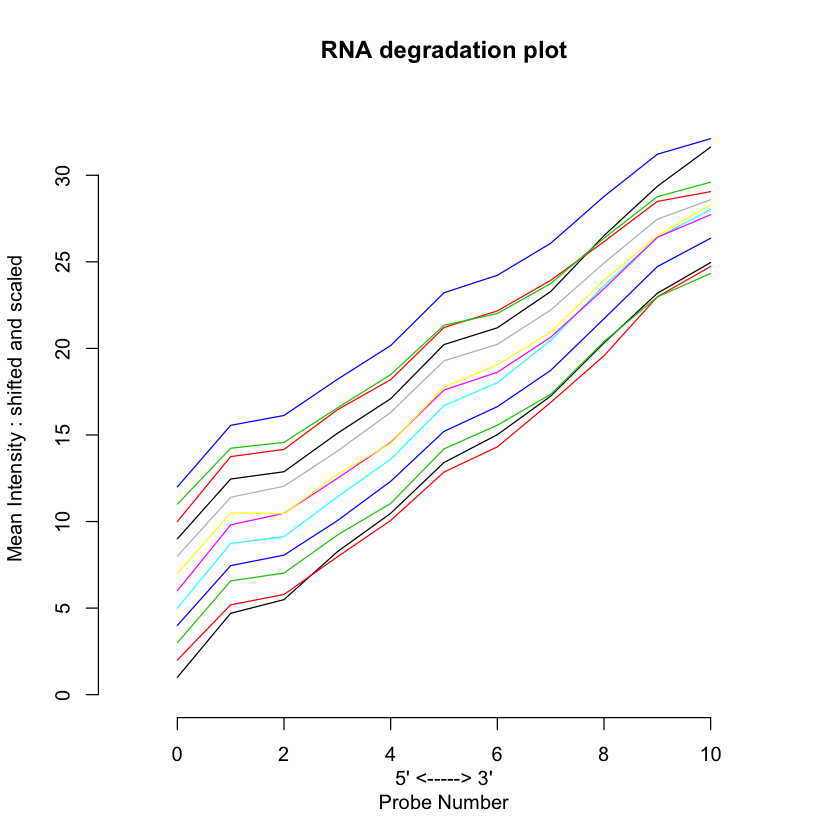

In [23]:
plotAffyRNAdeg(RNAdeg, cols = 1:12)

In [24]:
summaryAffyRNAdeg(RNAdeg) 

GSM465440_A435_1_Control.CEL.gz GSM465441_A435_2_Control.CEL.gz
slope                         2.37e+00                        2.26e+00
pvalue                        5.06e-12                        1.39e-10
       GSM465442_A435_3_Control.CEL.gz GSM465443_A435_1_Luteolin.CEL.gz
slope                         2.12e+00                         2.21e+00
pvalue                        5.97e-11                         6.55e-11
       GSM465444_A435_2_Luteolin.CEL.gz GSM465445_A435_3_Luteolin.CEL.gz
slope                          2.29e+00                         2.13e+00
pvalue                         7.79e-11                         7.29e-11
       GSM465446_A435_1_LPS.CEL.gz GSM465447_A435_2_LPS.CEL.gz
slope                     2.11e+00                    2.06e+00
pvalue                    2.70e-10                    3.30e-11
       GSM465448_A435_3_LPS.CEL.gz GSM465449_A435_1_LPS_Luteolin.CEL.gz
slope                     2.20e+00                             1.90e+00
pvalue                    2.85e-10                             1.92e-10
       GSM465450_A435_2_LPS_Luteolin.CEL.gz
slope                              1.86e+00
pvalue                             1.37e-10
       GSM465451_A435_3_LPS_Luteolin.CEL.gz
slope                              2.01e+00
pvalue                             5.71e-11

In [25]:
## 2) Quality check - affyQCReport
library(affyQCReport)

Loading required package: lattice


In [26]:
QCReport(data, file = "dataQC.pdf")

[1] TRUE

In [27]:
## 2) Quality check - simpleaffy
library(simpleaffy)

Loading required package: genefilter

Attaching package: ‘genefilter’

The following object is masked from ‘package:base’:

    anyNA



In [28]:
Data.qc <- qc(data); Data.qc

An object of class "QCStats"
Slot "scale.factors":
 [1] 0.3524101 0.3925910 0.3736151 0.3566020 0.3960589 0.4396673 0.4742899
 [8] 0.3393591 0.4075572 0.5201112 0.2988603 0.4391299

Slot "target":
[1] 100

Slot "percent.present":
     GSM465440_A435_1_Control.CEL.gz.present 
                                    48.83262 
     GSM465441_A435_2_Control.CEL.gz.present 
                                    48.88583 
     GSM465442_A435_3_Control.CEL.gz.present 
                                    48.22731 
    GSM465443_A435_1_Luteolin.CEL.gz.present 
                                    48.68628 
    GSM465444_A435_2_Luteolin.CEL.gz.present 
                                    48.42465 
    GSM465445_A435_3_Luteolin.CEL.gz.present 
                                    47.61313 
         GSM465446_A435_1_LPS.CEL.gz.present 
                                    45.81051 
         GSM465447_A435_2_LPS.CEL.gz.present 
                                    48.86810 
         GSM465448_A435_3_LPS.CEL.

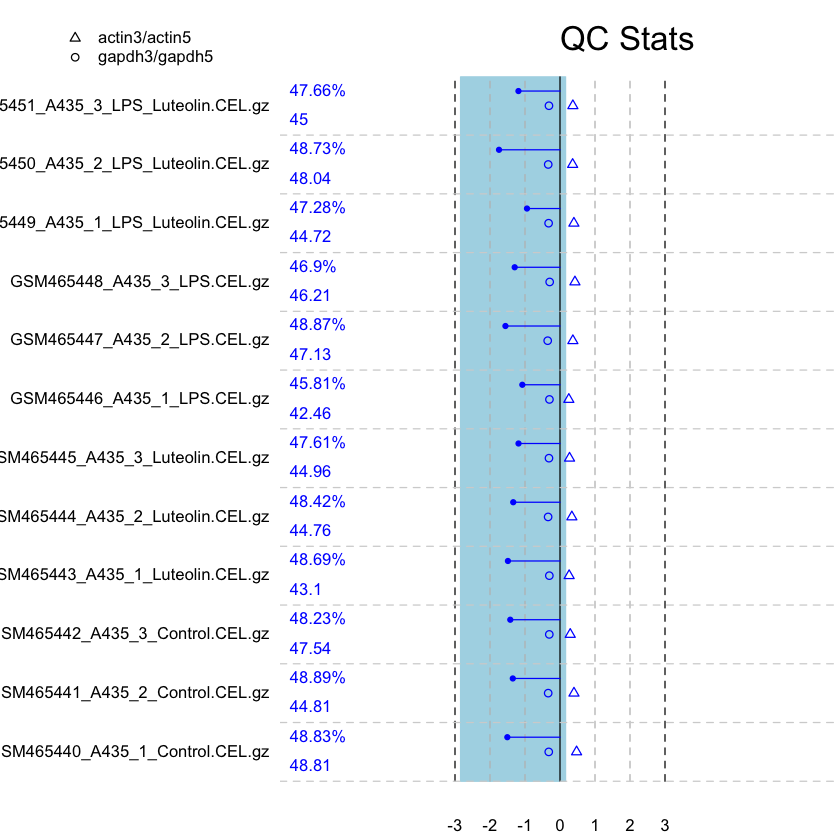

In [29]:
plot.qc.stats(Data.qc)

In [30]:
pdf("qcData.pdf")
plot(Data.qc)
dev.off()

pdf 
  2

In [82]:
## 3) NUSE, RLE - affyPLM
library(affyPLM)

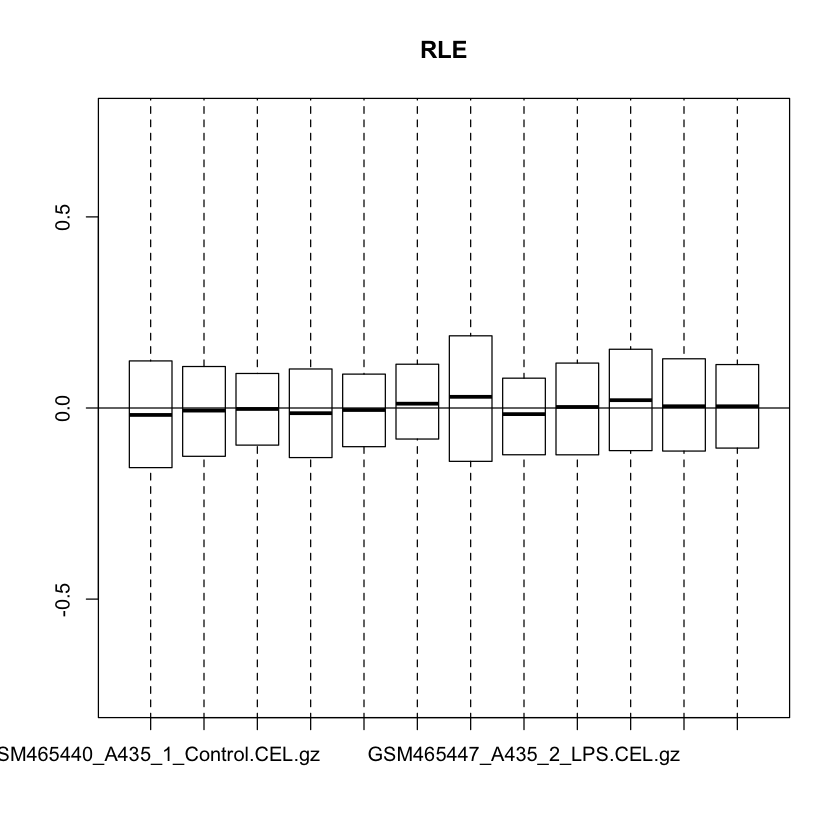

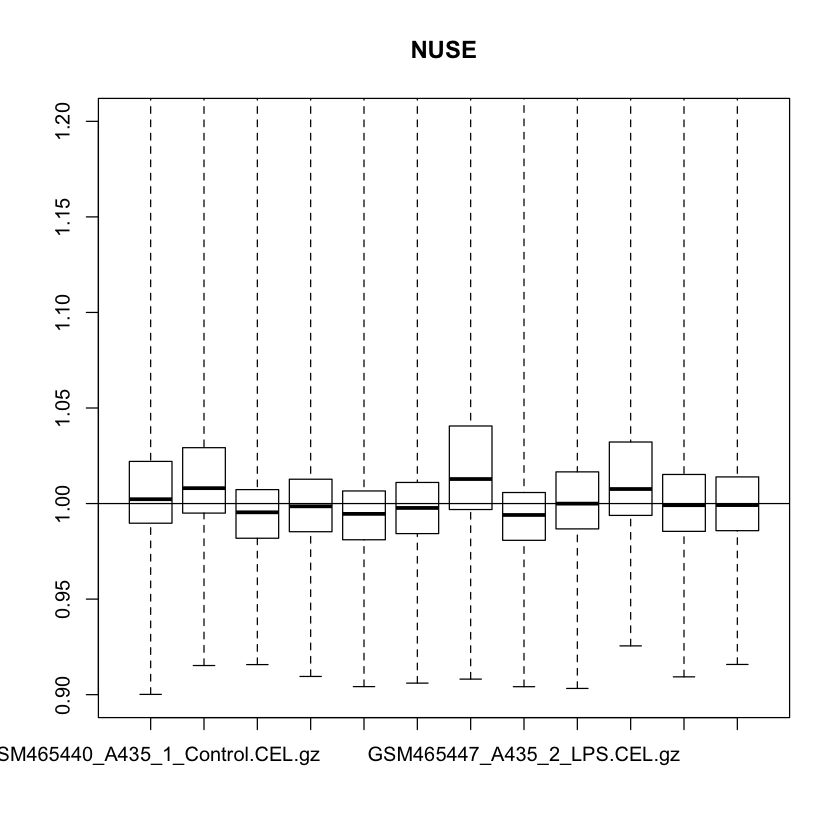

In [83]:
dataPLM <- fitPLM(data)
RLE(dataPLM, main="RLE")
NUSE(dataPLM, main = "NUSE")

### QC 참고자료
https://genevestigator.com/userdocs/manual/qc.html

---
## 4. Normalize, background correct and summarize data

In [32]:
rmaData <- rma(data)

Background correcting
Normalizing
Calculating Expression


### Currently the rma function implements RMA in the following manner
- 1) Probe specific correction of the PM probes using a model based on observed intensity being the sum of signal and noise
- 2) Normalization of corrected PM probes using quantile normalization (Bolstad et al.,2003)
- 3) Calculation of Expression measure using median polish.


In [67]:
rmaData

ExpressionSet (storageMode: lockedEnvironment)
assayData: 45101 features, 12 samples 
  element names: exprs 
protocolData
  sampleNames: GSM465440_A435_1_Control.CEL.gz
    GSM465441_A435_2_Control.CEL.gz ...
    GSM465451_A435_3_LPS_Luteolin.CEL.gz (12 total)
  varLabels: ScanDate
  varMetadata: labelDescription
phenoData
  sampleNames: GSM465440_A435_1_Control.CEL.gz
    GSM465441_A435_2_Control.CEL.gz ...
    GSM465451_A435_3_LPS_Luteolin.CEL.gz (12 total)
  varLabels: sample
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: mouse4302 

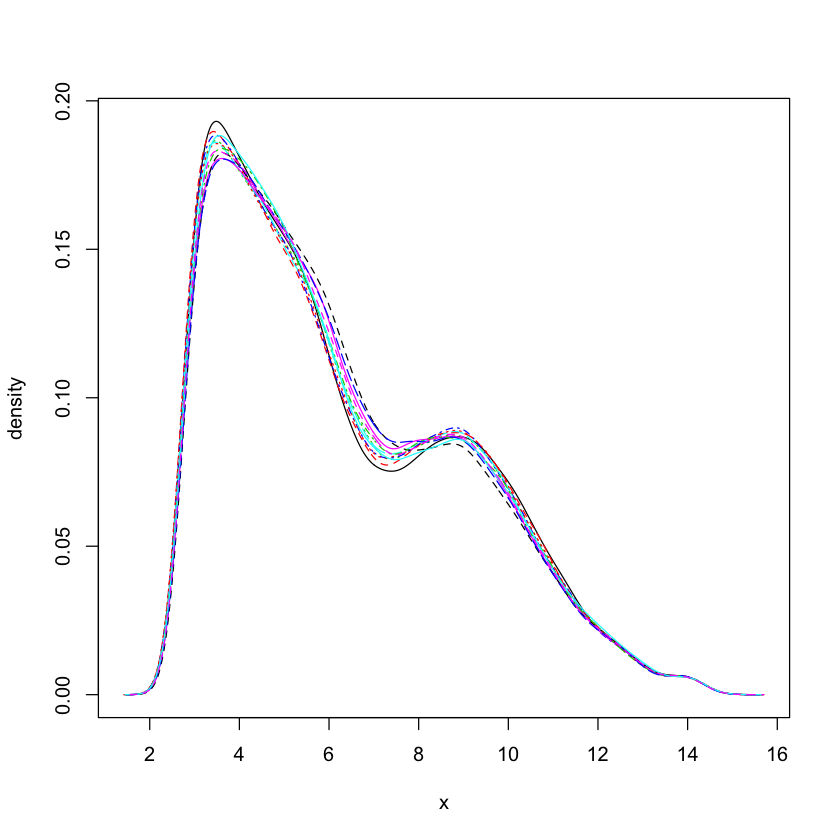

In [33]:
plotDensity(exprs(rmaData))

In [72]:
ExpSet <- expresso(data, normalize.method="quantiles",
                 bgcorrect.method="none", pmcorrect.method="pmonly",
                 summary.method="medianpolish")

background correction: none 
normalization: quantiles 
PM/MM correction : pmonly 
expression values: medianpolish 
background correcting...done.
normalizing...done.
45101 ids to be processed
|                    |
|####################|


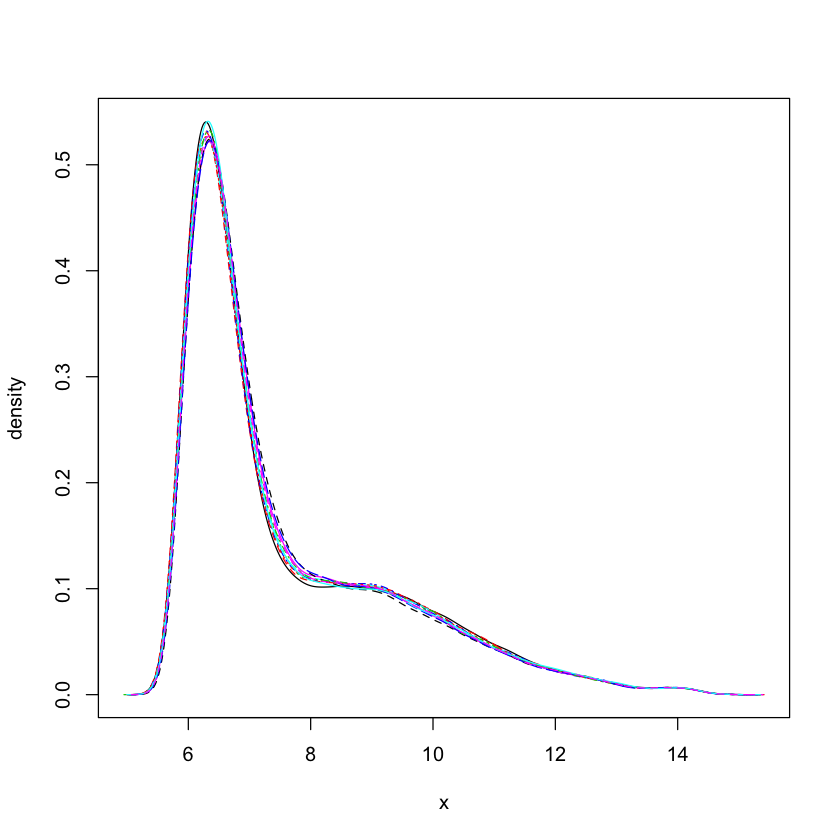

In [73]:
plotDensity(exprs(ExpSet))

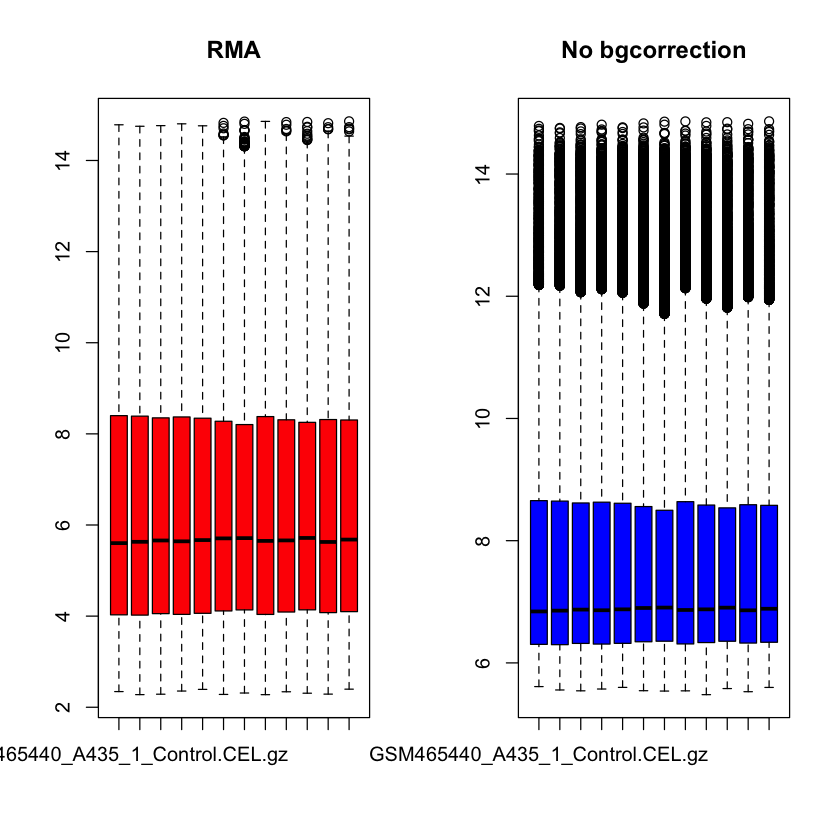

In [74]:
par(mfrow = c(1, 2))
boxplot(exprs(rmaData), col = "red", main = "RMA")
boxplot(exprs(ExpSet), col = "blue", main = "No bgcorrection")

In [55]:
pdf("eset_mva.pdf")
mva.pairs((exprs(ExpSet))[,1:8])
dev.off()

pdf 
  2

In [75]:
eset <- exprs(ExpSet)

In [76]:
head(row.names(eset))

[1] "1415670_at"   "1415671_at"   "1415672_at"   "1415673_at"   "1415674_a_at"
[6] "1415675_at"

In [77]:
colnames(eset)

[1] "GSM465440_A435_1_Control.CEL.gz"     
 [2] "GSM465441_A435_2_Control.CEL.gz"     
 [3] "GSM465442_A435_3_Control.CEL.gz"     
 [4] "GSM465443_A435_1_Luteolin.CEL.gz"    
 [5] "GSM465444_A435_2_Luteolin.CEL.gz"    
 [6] "GSM465445_A435_3_Luteolin.CEL.gz"    
 [7] "GSM465446_A435_1_LPS.CEL.gz"         
 [8] "GSM465447_A435_2_LPS.CEL.gz"         
 [9] "GSM465448_A435_3_LPS.CEL.gz"         
[10] "GSM465449_A435_1_LPS_Luteolin.CEL.gz"
[11] "GSM465450_A435_2_LPS_Luteolin.CEL.gz"
[12] "GSM465451_A435_3_LPS_Luteolin.CEL.gz"

In [79]:
colnames(eset) <- c("Con1", "Con2", "Con3", "Lut1", "Lut2", "Lut3",
                    "LPS1", "LPS2", "LPS3", "LPS_Lut1", "LPS_Lut2", "LPS_Lut3")

In [80]:
colnames(eset)

[1] "Con1"     "Con2"     "Con3"     "Lut1"     "Lut2"     "Lut3"    
 [7] "LPS1"     "LPS2"     "LPS3"     "LPS_Lut1" "LPS_Lut2" "LPS_Lut3"

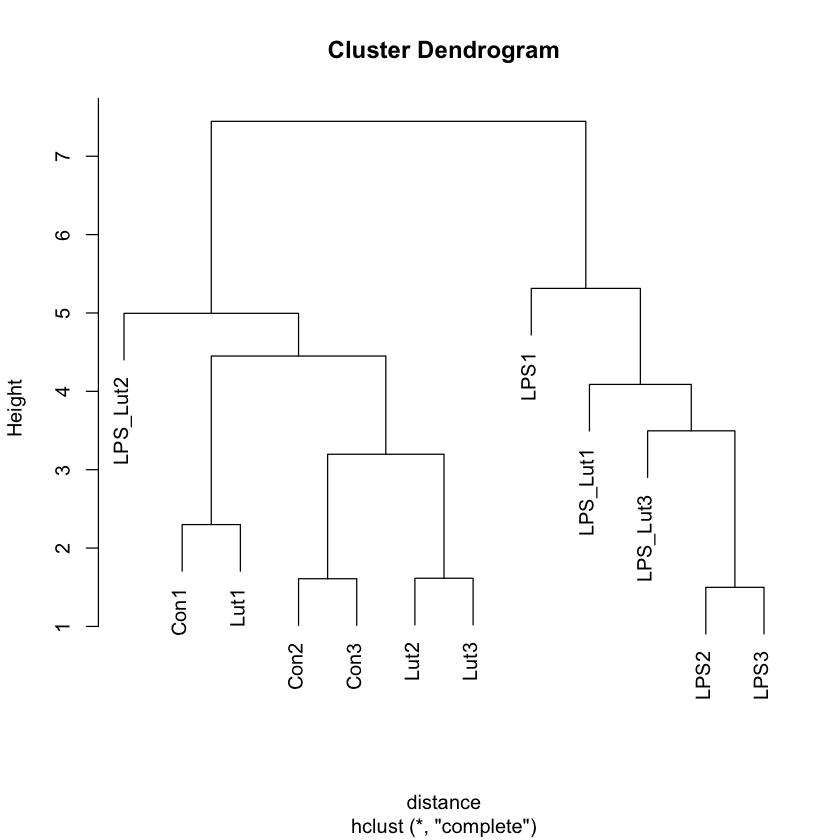

In [81]:
distance <- dist(t(eset),method="maximum")
clusters <- hclust(distance)
plot(clusters)